In [10]:
import pandas as pd
from sklearn import preprocessing

import matplotlib.pyplot as plt 

In [4]:
df_vote = pd.read_csv('data/vote_xgb_nn.csv')

In [5]:
df_vote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 7 columns):
ParcelId    int64
201610      float64
201611      float64
201612      float64
201710      float64
201711      float64
201712      float64
dtypes: float64(6), int64(1)
memory usage: 159.4 MB


In [6]:
df_vote.head()

,ParcelId,201610,201611,201612,201710,201711,201712
0,10711725,0.0058,NaN,NaN,NaN,NaN,NaN
1,10711726,0.0073,NaN,NaN,NaN,NaN,NaN
2,10711727,0.0174,NaN,NaN,NaN,NaN,NaN
3,10711728,0.0091,NaN,NaN,NaN,NaN,NaN
4,10711729,0.0078,NaN,NaN,NaN,NaN,NaN


In [8]:
from collections import Counter

In [10]:
c = Counter([0.2,0.1])
c

Counter({0.1: 1, 0.2: 1})

In [11]:
c.most_common(1)

[(0.1, 1)]

In [12]:
c.most_common(1)[0][0]

0.1

In [17]:
prop = pd.read_csv('data/properties_2016.csv', nrows=20).fillna(0)  # , nrows=500)

In [18]:
scaler_dict = {}
for n_col in prop.columns[:1]:
    print(n_col)
    print(prop[n_col])

    scaler = preprocessing.StandardScaler()
    scaler.fit(prop[n_col].values.reshape(-1,1))
    prop[n_col] = scaler.transform(prop[n_col].values.reshape(-1,1))
    print(prop[n_col])
    scaler_dict[n_col] = scaler

parcelid
0     10754147
1     10759547
2     10843547
3     10859147
4     10879947
5     10898347
6     10933547
7     10940747
8     10954547
9     10976347
10    11073947
11    11114347
12    11116947
13    11142747
14    11193347
15    11215747
16    11229347
17    11287347
18    11288547
19    11324547
Name: parcelid, dtype: int64
0    -1.610429
1    -1.579935
2    -1.105599
3    -1.017508
4    -0.900053
5    -0.796151
6    -0.597382
7    -0.556724
8    -0.478797
9    -0.355696
10    0.195438
11    0.423571
12    0.438253
13    0.583942
14    0.869673
15    0.996163
16    1.072960
17    1.400478
18    1.407254
19    1.610541
Name: parcelid, dtype: float64


In [3]:
loc_label = pd.read_csv('data/loc_label.csv')

In [4]:
loc_label.head()

,Unnamed: 0,parcelid,loc_label,longitude,latitude
0,0,10754147,843,-118654084.0,34144442.0
1,1,10759547,227,-118625364.0,34140430.0
2,2,10843547,1048,-118394633.0,33989359.0
3,3,10859147,640,-118437206.0,34148863.0
4,4,10879947,1084,-118385816.0,34194168.0


In [6]:
distribute_loc = loc_label.groupby(['loc_label'])['parcelid'].count()

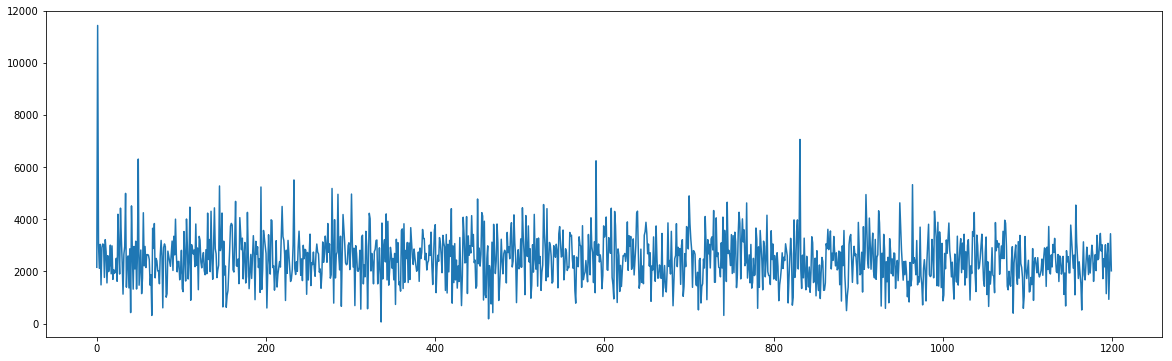

In [13]:
plt.figure(figsize=(20,6))
plt.plot(distribute_loc)
plt.show()